In [1]:
# Libraries

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

In [2]:
# Loading the data

df = pd.read_csv('Heart_Disease_Classification_Dataset_Cleaned.csv')

In [3]:
# Looking at the data

df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age,sex,trestbps,chol,fbs,restecg,thalach,...,oldpeak,slope,ca,chest_pain_1,chest_pain_2,chest_pain_3,thal_1,thal_2,thal_3,target
0,0,0,0,63,1,145.000000,233.0,1,0,150.0,...,2.3,0,0,0,0,1,1,0,0,1
1,1,1,1,37,1,130.000000,250.0,0,1,187.0,...,3.5,0,0,0,1,0,0,1,0,1
2,2,2,2,41,0,130.000000,204.0,0,0,172.0,...,1.4,2,0,1,0,0,0,1,0,1
3,3,3,3,56,1,120.000000,236.0,0,1,178.0,...,0.8,2,0,1,0,0,0,1,0,1
4,4,4,4,57,0,132.679938,354.0,0,1,163.0,...,0.6,2,0,0,0,0,0,1,0,1


In [4]:
# Dropping Unnamed (Index value, not relevant for analysis)

df2 = df.drop(["Unnamed: 0"], axis=1)
df2 = df2.drop(["Unnamed: 0.1"], axis=1)
df2 = df2.drop(["Unnamed: 0.1.1"], axis=1)
df2.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,chest_pain_1,chest_pain_2,chest_pain_3,thal_1,thal_2,thal_3,target
0,63,1,145.000000,233.0,1,0,150.0,0,2.3,0,0,0,0,1,1,0,0,1
1,37,1,130.000000,250.0,0,1,187.0,0,3.5,0,0,0,1,0,0,1,0,1
2,41,0,130.000000,204.0,0,0,172.0,0,1.4,2,0,1,0,0,0,1,0,1
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,1,0,0,0,1,0,1
4,57,0,132.679938,354.0,0,1,163.0,1,0.6,2,0,0,0,0,0,1,0,1


In [5]:
# Train/Test Split

X = df2.iloc[:, 0:17] 
y = df2.iloc[:, 17]

# Min-Max

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, train_size=0.8, stratify=y, random_state=0)

In [6]:
# Train Sklearn Neural Network 1 (2 layers, 100 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train) # 97.1%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9710743801652892

0.8688524590163934


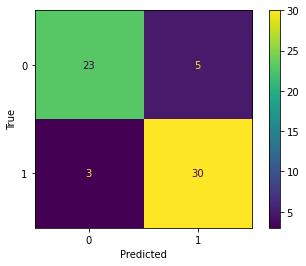

In [7]:
# Test NN 1

y_pred = mlp.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 86.89%

In [8]:
# Train Sklearn Neural Network 2 (4 layers, 100 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100), activation = 'relu', random_state = 1)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train) # 100%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

0.8032786885245902


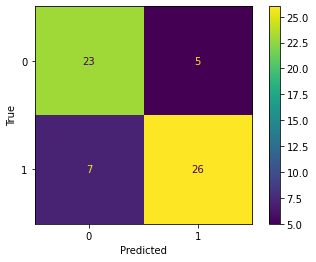

In [9]:
# Test NN 2

y_pred = mlp.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 80.33%

In [10]:
# Train Sklearn Neural Network 3 (2 layers, 100 units each, logistic)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', random_state = 1)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train) # 83.88%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8388429752066116

0.8360655737704918


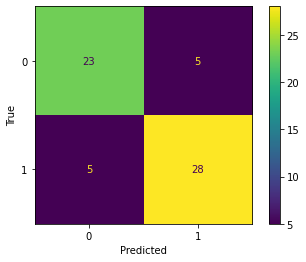

In [11]:
# Test NN 3

y_pred = mlp.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 83.61%

In [12]:
# Train Sklearn Neural Network 4 (2 layers, 100 units each, tanh)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'tanh', random_state = 1)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train) # 85.12%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8512396694214877

0.8360655737704918


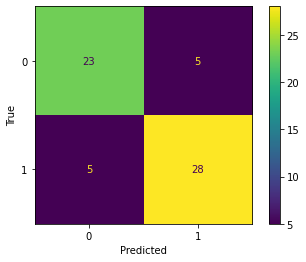

In [13]:
# Test NN 4

y_pred = mlp.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 83.61%

In [14]:
# Train Sklearn Neural Network 5 (2 layers, 200 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(200,200), activation = 'relu', random_state = 1)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train) # 99.17%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9917355371900827

0.8524590163934426


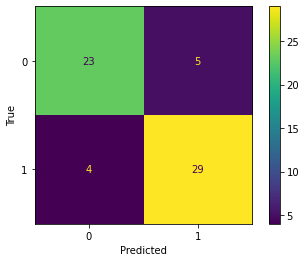

In [15]:
# Test NN 5

y_pred = mlp.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 85.25%

In [16]:
# Train Sklearn Neural Network 6 (2 layers, 50 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(50,50), activation = 'relu', random_state = 1)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train) # 91.74%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9173553719008265

0.8688524590163934


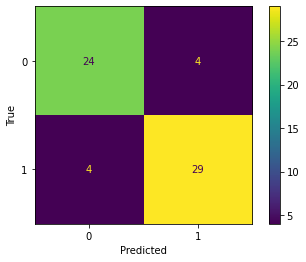

In [17]:
# Test NN 6

y_pred = mlp.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 86.89%

In [30]:
# Writing Train Set to CSV

df1 = pd.DataFrame(X_train, columns = ['age','sex','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','chest_pain_1','chest_pain_2','chest_pain_3','thal_1','thal_2','thal_3'])
df1['target'] = y_train

df1.to_csv('/Users/gregory/Desktop/school/capstone/code/hd_nn_train.csv', index=False)

In [31]:
# Defining FeatureDataset

class FeatureDataset(Dataset):
    
    def __init__(self, file_name):
        
        # Read in a csv file
        file_out = pd.read_csv(file_name)
        x = file_out.iloc[:,:-1].values
        y = file_out.iloc[:,-1:].values
        
        # Convert to torch tensors
        self.X_batch = torch.tensor(x, dtype = torch.float32)
        self.y_batch = torch.from_numpy(y).view(1, -1)[0].type(torch.LongTensor)
    
    def __len__(self):
        return len(self.y_batch)
    
    def __getitem__(self, idx):
        return self.X_batch[idx], self.y_batch[idx]

In [32]:
# Running the train set through FeatureDataset

feature_set = FeatureDataset('/Users/gregory/Desktop/school/capstone/code/hd_nn_train.csv')

In [21]:
# Torch data object

hd_torch = torch.utils.data.DataLoader(feature_set, batch_size=50, shuffle=True)
print(hd_torch)

In [59]:
# Defining Torch NN

class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer = nn.Linear(input_dim,100)
        self.hidden_layer1 = nn.Linear(100,100)
        self.hidden_layer2 = nn.Linear(100,100)
        self.output_layer = nn.Linear(100,output_dim)
        self.relu = nn.ReLU()
        self.Sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        out = self.relu(self.input_layer(x))
        out = self.relu(self.hidden_layer1(out))
        out = self.relu(self.hidden_layer2(out))
        out = self.output_layer(out)
        return out

In [64]:
# Initialize

n_epochs = 200
input_dim = 17
output_dim = 2
model = NeuralNetworkClassificationModel(input_dim,output_dim)

learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

0.5409836065573771
Confusion Matrix


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

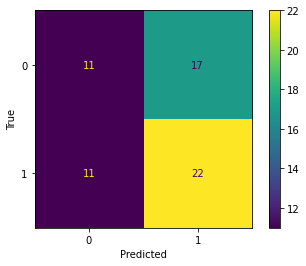

In [65]:
# Running the Model

def clean_labels(y_batch):
    y_batch[y_batch < 0] = 0  # Replace negative values with 0
    y_batch[y_batch > 1] = 1  # Replace values > 1 with 1
    return y_batch

model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in hd_torch:
        y_batch = clean_labels(y_batch)
        assert y_batch.min() >= 0 and y_batch.max() <= 1
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
model.eval()
X_test_torch = torch.tensor(X_test, dtype = torch.float32)
y_pred = model(X_test_torch)

final_pred = []
for i in range(len(y_pred)):
    final_pred.append(torch.argmax(y_pred[i]))
    
y_pred_final = np.array(final_pred)
y_test_final = np.array(y_test)

# Accuracy Score

print(accuracy_score(y_test_final, y_pred_final))

# Confusion Matrix

print('Confusion Matrix')
cf_matrix = confusion_matrix(y_test_final, y_pred_final)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [68]:
# PCA

# Loading the data

df_pca = pd.read_csv('hd_pca.csv')

# Looking at the data

df_pca.head()

,Unnamed: 0,target,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1,1,-2.429920,1.227545,5.318811,-2.126395,-0.544222,0.064007,-0.050474,0.967102,0.506234,0.329697,1.151475,-1.725178,0.292555,-0.309600,-0.290396,0.114007,-0.019986
1,2,1,0.721195,-0.281984,-0.328842,-2.358104,-0.759147,1.779358,0.473326,1.602062,0.986535,-2.173703,0.896514,1.006841,-1.478196,-0.209001,-0.220719,-0.397759,0.025964
2,3,1,2.568912,-0.318636,0.713543,0.530979,1.501292,0.285505,-0.125381,0.812555,-0.040128,-1.344519,-0.797776,0.557769,1.024341,-0.190077,0.858935,1.065946,-0.013232
3,4,1,2.335994,-1.015175,0.566396,0.694903,1.201322,-0.532286,0.810819,-0.179714,0.128637,-0.511888,-0.080877,-0.263581,-1.195391,-0.999259,0.212983,0.129738,0.015585
4,5,1,1.045232,1.367217,-1.124890,0.810735,1.259036,0.410420,0.171669,0.647294,-0.595034,1.743017,1.411727,0.796217,-0.128424,-0.703468,0.155636,-0.290774,-0.001993


In [69]:
df_pca2 = df_pca.drop(["Unnamed: 0"], axis=1)
df_pca2.head()

,target,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1,-2.429920,1.227545,5.318811,-2.126395,-0.544222,0.064007,-0.050474,0.967102,0.506234,0.329697,1.151475,-1.725178,0.292555,-0.309600,-0.290396,0.114007,-0.019986
1,1,0.721195,-0.281984,-0.328842,-2.358104,-0.759147,1.779358,0.473326,1.602062,0.986535,-2.173703,0.896514,1.006841,-1.478196,-0.209001,-0.220719,-0.397759,0.025964
2,1,2.568912,-0.318636,0.713543,0.530979,1.501292,0.285505,-0.125381,0.812555,-0.040128,-1.344519,-0.797776,0.557769,1.024341,-0.190077,0.858935,1.065946,-0.013232
3,1,2.335994,-1.015175,0.566396,0.694903,1.201322,-0.532286,0.810819,-0.179714,0.128637,-0.511888,-0.080877,-0.263581,-1.195391,-0.999259,0.212983,0.129738,0.015585
4,1,1.045232,1.367217,-1.124890,0.810735,1.259036,0.410420,0.171669,0.647294,-0.595034,1.743017,1.411727,0.796217,-0.128424,-0.703468,0.155636,-0.290774,-0.001993


In [71]:
# Train/Test Split

# First 2 PCs
X_pca = df_pca2.iloc[:, 1:3] 
y_pca = df_pca2.iloc[:, 0]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, train_size=0.8, stratify=y, random_state=0)

In [72]:
# Train Sklearn Neural Network 1 (2 layers, 100 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)
mlp.score(X_train_pca, y_train_pca) # 82.64%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8264462809917356

0.819672131147541


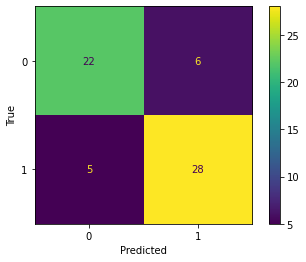

In [73]:
# Test NN 1

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
print(score) # 81.97%